# Logistic Regression Assignment

- Run the below cells. If you have the data in a different directory, you'll need to change the url.
- Complete all of the numbered questions. You may call any packages that we've used in class.  

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/log_reg/employee-turnover-balanced.csv')
data.head()

,left_company,age,frequency_of_travel,department,commuting_distance,education,satisfaction_with_environment,gender,seniority_level,position,satisfaction_with_job,married_or_single,last_raise_pct,last_performance_rating,total_years_working,years_at_company,years_in_current_job,years_since_last_promotion,years_with_current_supervisor
0,No,37,Travel_Rarely,Sales,16,4,4,Male,2,Sales Executive,3,Divorced,19,3,9,1,0,0,0
1,No,39,Travel_Rarely,Research & Development,3,2,3,Male,2,Laboratory Technician,3,Divorced,15,3,11,10,8,0,7
2,No,52,Travel_Frequently,Research & Development,25,4,3,Female,4,Manufacturing Director,4,Married,22,4,31,9,8,0,0
3,No,50,Non-Travel,Sales,1,3,4,Female,2,Sales Executive,3,Married,12,3,19,18,7,0,13
4,No,44,Travel_Rarely,Research & Development,4,3,4,Male,2,Healthcare Representative,2,Single,12,3,10,5,2,2,3


## Data Definitions
- `left_company`: Whether individual left the company or not. This is the target variable.  
- `age`: Age of individual. 
- `frequency_of_travel`: How often person travels for work.  
- `department`: Department person works(worked).  
- `commuting_distance`: Distance person lives from office.  
- `education`: Highest education category.  
- `satisfaction_with_environment`: Satisfaction of environment, on lickert scale.  
- `gender`: Gender of individual.  
- `seniority_level`: Seniority level of individual.  
- `position`: Last position held at the company.  
- `satisfaction_with_job`: Satisfaction of their job, on lickert scale.  
- `married_or_single`: Marital status of person.  
- `last_raise_pct`: Percent increase their last raise represented.  
- `last_performance_rating`: Most recent annual performance rating, on lickert scale.  
- `total_years_working`: Number of years the individual has spent working in their career.  
- `years_at_company`: Number of years the individual has been at the company, regardless of position.  
- `years_in_current_job`: Number of years the individual has been in their current position.  
- `years_since_last_promotion`: Years since the person had their last promotion.  
- `years_with_current_supervisor`: Years the person has had their current supervisor.

# Question 1
- What is the distribution of the target (`left_company`)?  
- Do you have any concerns on class imbalances?

In [23]:
data.left_company.value_counts()
data.columns

Index(['left_company', 'age', 'frequency_of_travel', 'department',
       'commuting_distance', 'education', 'satisfaction_with_environment',
       'gender', 'seniority_level', 'position', 'satisfaction_with_job',
       'married_or_single', 'last_raise_pct', 'last_performance_rating',
       'total_years_working', 'years_at_company', 'years_in_current_job',
       'years_since_last_promotion', 'years_with_current_supervisor'],
      dtype='object')

The target is perfectly balanced if the dataset had a significant disparity between the number of instances in each class, it could've led to issues in model performance.

# Question 2
- Create and print a list of the variables that you would treat as numerical and another list for the variables that you would treat as categorical.  
- Explain your choices.

In [24]:
numerical_variables = ['age', 'commuting_distance', 'last_performance_rating', 
                  'last_raise_pct', 'satisfaction_with_environment', 'satisfaction_with_job',
                  'total_years_working', 'years_at_company', 'years_in_current_job',
                  'years_since_last_promotion', 'years_with_current_supervisor']

categorical_variables = ['department', 'education', 'frequency_of_travel', 'gender',
                    'married_or_single', 'position',  'seniority_level']

The variables on lickert scale are numerical variables and the categorical variables are the ones which have strings, or non ordinal such as seniority level and education(they are in category)

# Question 3
- Determine if any numerical variables risk multicolinearity.  
- Remove those variables (if any) from your numerical_vars list.  
- Why did you or did not remove any?

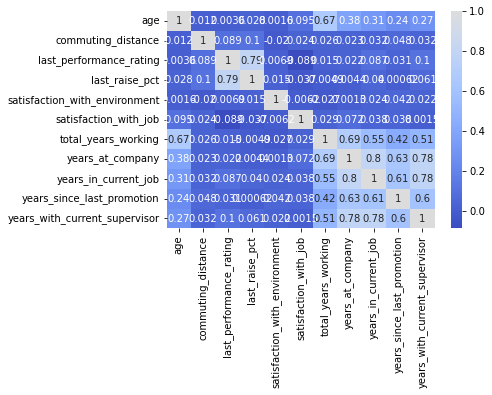

In [25]:
data_num = data[numerical_variables]

# Compute the correlation matrix
corr_matrix = data_num.corr()

import seaborn as sns

# Plot the correlation matrix heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', center=1, annot=True)
plt.show()


In [26]:
numerical_variables.remove('years_at_company')

We have dropped the variables which had the correlation greater than 0.8 (years_at_company)

# Question 4
- Split the data into training and test sets.  
- Use 20% of the data for test and a random state of 124.  

In [27]:
# insert code here
from sklearn.model_selection import train_test_split

y = data['left_company']
X = data.drop('left_company', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 124)

# Question 5
- Create a pipeline to process the numerical data.  
- Create a pipeline to process the categorical data.  

Verify each pipeline contains the columns you would expect using a fit_transform on the training data, i.e., print the shapes of the fit_transforms for each pipeline.

In [28]:
# insert code here
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Create a pipeline for numerical columns
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create a pipeline for categorical columns
cat_preprocessor = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine numerical and categorical pipelines using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_variables),
        ('cat', cat_preprocessor, categorical_variables)
    ])

# Fit and transform the training data using the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)

# Verify the shape of the processed numerical data
print(f'Numerical data shape: {X_train_processed[:, :len(numerical_variables)].shape}')

# Verify the shape of the processed categorical data
print(f'Categorical data shape: {X_train_processed[:, len(categorical_variables):].shape}')


Numerical data shape: (800, 10)
Categorical data shape: (800, 33)


# Question 6
- Create a pipeline that combines the pre-processing and implements a logistic regression model.  
- Print the accuracy on the training set and the test set.
- Do you have any concerns of overfitting based on the differences between the two accuracy scores?

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the pipeline with the preprocessor and logistic regression model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the training data and calculate accuracy
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Predict on the test data and calculate accuracy
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracies
print("Training accuracy: {:.3f}".format(train_accuracy))
print("Test accuracy: {:.3f}".format(test_accuracy))

Training accuracy: 0.759
Test accuracy: 0.710


Here since the difference in accuracies is nearly 5%, which is not a problem. This model does not suffer from the problem of overfitting since it is performing nearly the same on the test and training data

# Question 7
What would you recommend as potential next steps for continuing to develop and evaluate a model?

The potential steps that can be taken are by reducing the number of variables used and by using stricter criteria for multicolinearity of 0.7 Logistic Regression does not have any hyperparameter so the grid search algorithms cannot help. Using more data, Feature engineering, and cross validation(to evaluate model) can also be considered